In [4]:
from donkeycar.gym import remote_controller
import matplotlib.pyplot as plt
import cv2

using donkey v3.1.1 ...


In [5]:
controller = remote_controller.DonkeyRemoteContoller("kari","mqtt.eclipse.org")

(clean_session) connecting to broker mqtt.eclipse.org
connected.
connecting to broker mqtt.eclipse.org
connected.


In [6]:
import numpy as np

In [7]:
def rgb2gray(rgb):
    '''
    take a numpy rgb image return a new single channel image converted to greyscale
    '''
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


In [11]:
a = rgb2gray(controller.observe())
a = cv2.resize(a, (40, 40))

In [12]:
b = rgb2gray(controller.observe())
b = cv2.resize(b, (40, 40))

In [13]:
len(a[np.isclose(a, b, atol=3)])

1514

In [14]:
def image_to_ascii(im):
    asc = []
    chars = ["B","S","#","&","@","$","%","*","!",":","."]
    for j in range(im.shape[1]):
        line = []
        for i in range(im.shape[0]):
            line.append(chars[int(im[i, j]) // 25])
        asc.append("".join(line))

    for line in asc:
        print(line)

In [15]:
import time

In [16]:
steering = np.random.rand() * 2 - 1
a = rgb2gray(controller.observe())
a = cv2.resize(a, (40, 40))
controller.take_action([1, 0])
time.sleep(1)

In [17]:
b = rgb2gray(controller.observe())
b = cv2.resize(b, (40, 40))
print(steering)
print(len(a[np.isclose(a, b, atol=3)]))

0.9934101908004296
1541


In [18]:
steering

0.9934101908004296

In [19]:
image_to_ascii(a.T)

***!!!!!!!!!!!!*@#S#####################
***!!!!!!!!!!!**&#S###########&&&#######
****!!!!!!!!!***#SS##########&&&&&&#####
***************%SBS#######&&&&&&&&&#####
**************%%SSS#S####&&&&&&&&&&&&###
*************%%%SBBSS####&&&&&&&&&&&&###
%***********%%%%BSS###&##&&&###&&&&&&###
%*********%%%%%$BBS##&&#&&&&#S##&&&&&###
%%**%%%%%%%%%%$$BSS##&&#&&&&#BS##&&&&&##
%%%%%%%%%%%%%$$$BBS##&&###&&S#&#####&&&#
%%%%%%%%%%%%%$$$BS##&#SBSSSBSSSSSSS#&&&#
%%%%%%%%%%%%$$$$BS####SBS#SB#####SSS#&&#
%%%%%%%%%%%$$$$$BS#&#SBBS#S#########&&&&
%%%%%%%%$$$$$$$&BS#&#SBBBSS###S&##&&&&&&
%%%%%%$$$$$$$$$@BS#&#SBBBSSS##S&###&&&&&
%%%%$$$$$$$$$$$@BS#&&&&&&&&@&#BBBS#S&&&&
$%%$$$$$$$$$$$$$BS#&S&&&&@@@@@&@@BS@SS&&
$$$$$$$$$$$$$@$@SS#&#&&&&@@&@@@@SBB&@@@&
$$$$$$$$$$$$$$$@S##&#&&&&@@&@@@@BBBB@@&&
$$$$$$$$@$$@@&@$$BB$$$@&&&@&&&@&BBBB@@#&
$$$$$$$@@@$@$&@%@#@%$$$$$$$$@@@#BBBS@@S#
$$$$$$@@@@%B%#@%%%%%%%$%%%%%$$$$#BB#@@&B
$$$$@@@@BBBBBSBB&%%%%%%%%%%%%$%%@@&@@#BB
$$@@@&BBBBSBBBBSB@%%%%%%%%%%%%%%&BS&@SBB
@@@%%#SBBB&BBB&@

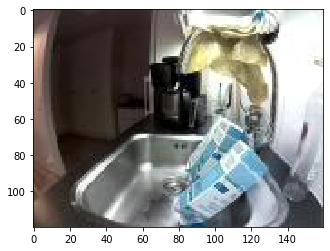

In [123]:
plt.imshow(controller.observe())

In [128]:
def calculate_lag(n_times):
    ims = []
    times = []
    for i in range(n_times):
        ims.append(controller.observe())
        times.append(time.time_ns())
    print("Images taken")
    results = []
    for i in range(n_times - 1):
        prev = ims[i]
        cur = ims[i + 1]
        #prev = np.dot(ims[i][...,:3], [0.299, 0.587, 0.114])
        #cur = np.dot(ims[i + 1][...,:3], [0.299, 0.587, 0.114])
        results.append(len(prev[np.isclose(prev, cur)]))

    results = np.array(results)
    time_array = np.array(times[:-1])
    
    differences = np.diff(time_array[results != np.prod(prev.shape)]) / 1e6
    plt.plot(differences)
    return np.mean(differences), differences, times, results

Images taken
50.26200714285714
CPU times: user 15.5 s, sys: 41.5 ms, total: 15.5 s
Wall time: 15.4 s


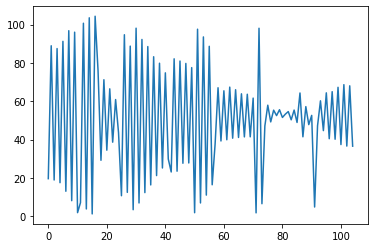

In [129]:
%%time
mean, diff, times, results = calculate_lag(10000)
print(mean)

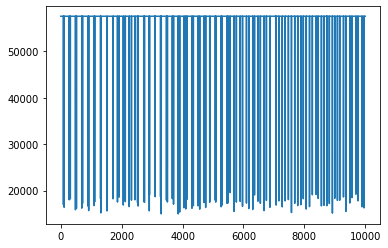

In [130]:
plt.plot(results)

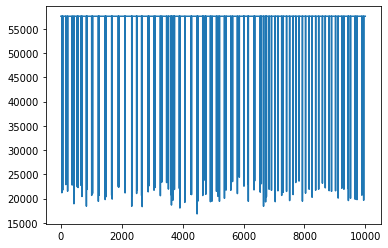

In [74]:
plt.plot(results)

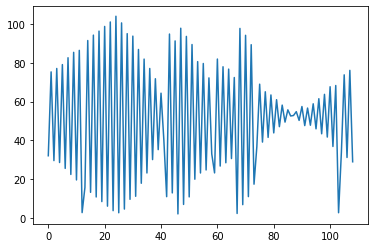

In [75]:
plt.plot(np.diff(time_array[results != np.prod(prev.shape)]) / 1e6)

In [76]:
np.mean(np.diff(time_array[results != 57600]) / 1e6)

50.46679984403669

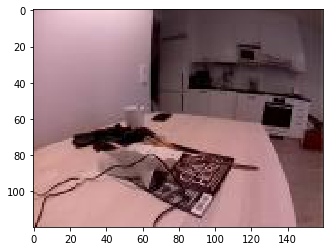

In [23]:
plt.imshow(prev)

In [136]:
b = controller.observe()

In [137]:
b.shape

(120, 160, 3)

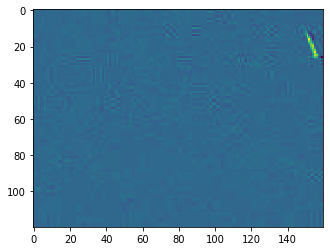

In [135]:
plt.imshow(a - b)

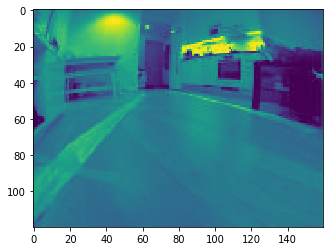

In [105]:
plt.imshow(b)

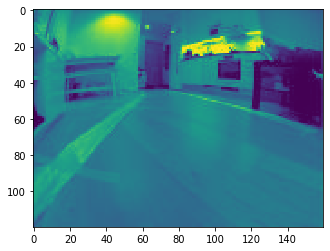

In [106]:
plt.imshow(a)

In [114]:
len(a[np.isclose(a, b)])

2945

In [72]:
a.reshape(1, -1).shape

(1, 19200)

In [91]:
a = np.random.rand(40,40)

In [96]:
b = np.stack((a, a, a, a))[np.newaxis, :]

In [97]:
b.shape

(1, 4, 40, 40)

In [99]:
b[0, 3, :, :].shape

(40, 40)

In [115]:
float(1 < 2)

1.0

In [15]:
class Car:
    
    def __init__(self, car = "kari", server = "mqtt.eclipse.org"):
        self.control = remote_controller.DonkeyRemoteContoller(car, server)
    
    def stop():
        self.control.take_action(action=[0, 0])
    
    def step(self, control):
        self.control.take_action(action=control)
        
            

In [16]:
class Trainer:
    
    def __init__(self):
        self.car = Car()
        self.algorithm = SAC()
        
        
    def run(self):
        try:
            im = car.reset()
            speedometer = Speedometer(im)
            while True:
                control = self.algorithm(im)
                next_im = self.car.step(control)
                
        except KeyboardInterrupt:
            self.car.stop()
            self.algorithm.reset()
            self.idle()
    
    
    def idle():
        input("Press enter to start again:")
        self.run()
        

In [ ]:
class SAC:
    
    
    